# 네이버 금융 상장회사 재무제표 크롤링

## 기본 정보

KT - 종목코드 : 030200

네이버 금융 > 종목코드로 검색 > 중간에 "종합정보" 있는 탭에서 "종목분석" 선택 > 아래에 "Financial Summary" 부분이 재무제표

http://finance.naver.com/item/coinfo.nhn?code=030200

## Financial Summary 영역

iframe 으로 구성되어 있음. iframe의 src 링크 참조.

http://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd=030200

![img](./images/finsum0001.jpg)

Financial Summary에서 "연간" 선택 > "검색" 클릭

![img](./images/finsum0002.jpg)

![img](./images/finsum0003.jpg)

검색 버튼 클릭시 실제로 요청하는 URL은 다음과 같다. 이 URL이 크롤링에 필요한 주소이다.

http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd=030200&fin_typ=0&freq_typ=Y

* cmp_cd : 종목코드
* fin_typ : 0 주재무제표     --- 여기서는 0으로 fix
* freq_typ : Y 연간, Q 분기  --- 여기서는 Y로 fix

## 재무제표 데이터 크롤링

크롤링 목표 페이지가 테이블 형태이므로 pandas를 사용한다.

In [1]:
import pandas as pd

In [2]:
itemcode = '030200'
url = 'http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd={}&fin_typ=0&freq_typ=Y'.format(itemcode)

In [3]:
data = pd.read_html(url, encoding='utf-8')
fin_df = data[0]
fin_df = fin_df.set_index('주요재무정보')  # index
fin_df

,연간,2012/12 (IFRS연결),2013/12 (IFRS연결),2014/12 (IFRS연결),2015/12 (IFRS연결),2016/12 (IFRS연결),2017/12(E) (IFRS연결),2018/12(E) (IFRS연결),2019/12(E) (IFRS연결)
주요재무정보,,,,,,,,,
매출액,2.385640e+05,2.381060e+05,2.231170e+05,2.228120e+05,2.274370e+05,230306.00,234987.00,239734.00,NaN
영업이익,1.209200e+04,8.393000e+03,-4.066000e+03,1.292900e+04,1.440000e+04,15281.00,16260.00,17037.00,NaN
세전계속사업이익,1.414800e+04,-5.300000e+01,-1.328600e+04,7.195000e+03,1.127000e+04,12156.00,13489.00,14753.00,NaN
당기순이익,1.105400e+04,-6.030000e+02,-9.662000e+03,6.313000e+03,7.978000e+03,8947.00,10023.00,11050.00,NaN
당기순이익(지배),1.046100e+04,-1.624000e+03,-1.055000e+04,5.530000e+03,7.111000e+03,8167.00,9192.00,10205.00,NaN
당기순이익(비지배),5.930000e+02,1.022000e+03,8.880000e+02,7.830000e+02,8.680000e+02,NaN,NaN,NaN,NaN
자산총계,3.455790e+05,3.484650e+05,3.377550e+05,2.934120e+05,3.058770e+05,308399.00,314348.00,322161.00,NaN
부채총계,2.133990e+05,2.198160e+05,2.198520e+05,1.717570e+05,1.779300e+05,173337.00,171659.00,171296.00,NaN
자본총계,1.321800e+05,1.286490e+05,1.179030e+05,1.216550e+05,1.279480e+05,134746.00,142324.00,150468.00,NaN


### DataFrame 정리

'연간'이 컬럼명으로 들어가면서 컬럼이 하나씩 밀렸다. '연간' 삭제

In [4]:
colnames = list(fin_df.columns)
colnames.remove('연간')
colnames

['\n\t\t\t\t\t\t\t\t\t2012/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2013/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2014/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2015/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2016/12\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2017/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2018/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t2019/12(E)\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t(IFRS연결)\n\t\t\t\t\t\t\t\t']

나머지 컬럼명에서 '년/월' 정보만 추출. / 기호를 - 로 변경.

In [5]:
import re
from datetime import datetime

In [6]:
def get_date_str(s):
    date_str = ''
    r = re.search("\d{4}/\d{2}", s)
    if r:
        date_str = r.group()
        date_str = date_str.replace('/', '-')
        
    return date_str

In [7]:
colnames = [get_date_str(x) for x in colnames]
colnames

['2012-12',
 '2013-12',
 '2014-12',
 '2015-12',
 '2016-12',
 '2017-12',
 '2018-12',
 '2019-12']

In [8]:
fin_df = fin_df.ix[:, :-1]   # 밀려서 생긴 마지막 컬럼 제거
fin_df.columns = colnames
fin_df.head()

,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12
주요재무정보,,,,,,,,
매출액,238564.0,238106.0,223117.0,222812.0,227437.0,230306.0,234987.0,239734.0
영업이익,12092.0,8393.0,-4066.0,12929.0,14400.0,15281.0,16260.0,17037.0
세전계속사업이익,14148.0,-53.0,-13286.0,7195.0,11270.0,12156.0,13489.0,14753.0
당기순이익,11054.0,-603.0,-9662.0,6313.0,7978.0,8947.0,10023.0,11050.0
당기순이익(지배),10461.0,-1624.0,-10550.0,5530.0,7111.0,8167.0,9192.0,10205.0


## 년도 기준으로 데이터 변환

In [9]:
trans_df = fin_df.T
trans_df.rename(columns={'주요재무정보':'date'}, inplace=True)
trans_df.index = pd.to_datetime(trans_df.index)
trans_df

주요재무정보,매출액,영업이익,세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2012-12-01,238564.0,12092.0,14148.0,11054.0,10461.0,593.0,345579.0,213399.0,132180.0,123092.0,...,161.45,772.56,4006.0,8.86,50505.0,0.70,2000.0,5.63,46.60,261111808.0
2013-12-01,238106.0,8393.0,-53.0,-603.0,-1624.0,1022.0,348465.0,219816.0,128649.0,117552.0,...,170.87,734.24,-622.0,-50.72,48199.0,0.65,800.0,2.54,-120.12,261111808.0
2014-12-01,223117.0,-4066.0,-13286.0,-9662.0,-10550.0,888.0,337755.0,219852.0,117903.0,103410.0,...,186.47,639.91,-4040.0,-7.73,42232.0,0.74,0.0,0.00,0.00,261111808.0
2015-12-01,222812.0,12929.0,7195.0,6313.0,5530.0,783.0,293412.0,171757.0,121655.0,108451.0,...,141.18,671.30,2118.0,13.34,44293.0,0.64,500.0,1.77,22.14,261111808.0
2016-12-01,227437.0,14400.0,11270.0,7978.0,7111.0,868.0,305877.0,177930.0,127948.0,114419.0,...,139.06,709.33,2723.0,10.80,46707.0,0.63,800.0,2.72,27.56,261111808.0
2017-12-01,230306.0,15281.0,12156.0,8947.0,8167.0,NaN,308399.0,173337.0,134746.0,120818.0,...,128.64,NaN,3128.0,10.33,49319.0,0.65,941.0,2.91,0.30,NaN
2018-12-01,234987.0,16260.0,13489.0,10023.0,9192.0,NaN,314348.0,171659.0,142324.0,127766.0,...,120.61,NaN,3520.0,9.18,52155.0,0.62,1078.0,3.34,0.31,NaN
2019-12-01,239734.0,17037.0,14753.0,11050.0,10205.0,NaN,322161.0,171296.0,150468.0,135199.0,...,113.84,NaN,3908.0,8.26,55189.0,0.59,1184.0,3.67,0.30,NaN


In [10]:
trans_df.columns

Index(['매출액', '영업이익', '세전계속사업이익', '당기순이익', '당기순이익(지배)', '당기순이익(비지배)', '자산총계',
       '부채총계', '자본총계', '자본총계(지배)', '자본총계(비지배)', '자본금', '영업활동현금흐름', '투자활동현금흐름',
       '재무활동현금흐름', 'CAPEX', 'FCF', '이자발생부채', '영업이익률', '순이익률', 'ROE(%)',
       'ROA(%)', '부채비율', '자본유보율', 'EPS(원)', 'PER(배)', 'BPS(원)', 'PBR(배)',
       '현금DPS(원)', '현금배당수익률', '현금배당성향(%)', '발행주식수(보통주)'],
      dtype='object', name='주요재무정보')

In [11]:
# 단위 : 억원
# % : 영업이익률, 순이익률, ROE, ROA, 부채비율, 자본유보율, 현금배당수익률, 현금배당성향
# 배 : PER, PBR
# 원 : EPS, BPS, 현금DPS

In [12]:
colnames = ['sales','biz_profit','net_profit','assets','debts','gross_capital','capital','cash_oper','cash_invest',
            'cash_finance','capex','fcf','debt_interest','rob','ron','roe','roa','debt_ratio','reserve_ratio',
            'eps','per','bps','pbr','dps','d_profit','d_tendency','totalshares']

In [13]:
# 필요한 컬럼만 추출
summary_df = trans_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','자본금','영업활동현금흐름','투자활동현금흐름',
                       '재무활동현금흐름','CAPEX','FCF','이자발생부채','영업이익률','순이익률','ROE(%)','ROA(%)','부채비율','자본유보율',
                       'EPS(원)','PER(배)','BPS(원)','PBR(배)','현금DPS(원)','현금배당수익률','현금배당성향(%)','발행주식수(보통주)']]
# 컬럼명 영문으로 변경
summary_df.columns = colnames
summary_df

,sales,biz_profit,net_profit,assets,debts,gross_capital,capital,cash_oper,cash_invest,cash_finance,...,debt_ratio,reserve_ratio,eps,per,bps,pbr,dps,d_profit,d_tendency,totalshares
2012-12-01,238564.0,12092.0,11054.0,345579.0,213399.0,132180.0,15645.0,57255.0,-38512.0,-12778.0,...,161.45,772.56,4006.0,8.86,50505.0,0.70,2000.0,5.63,46.60,261111808.0
2013-12-01,238106.0,8393.0,-603.0,348465.0,219816.0,128649.0,15645.0,41111.0,-37826.0,-3118.0,...,170.87,734.24,-622.0,-50.72,48199.0,0.65,800.0,2.54,-120.12,261111808.0
2014-12-01,223117.0,-4066.0,-9662.0,337755.0,219852.0,117903.0,15645.0,19164.0,-31710.0,10717.0,...,186.47,639.91,-4040.0,-7.73,42232.0,0.74,0.0,0.00,0.00,261111808.0
2015-12-01,222812.0,12929.0,6313.0,293412.0,171757.0,121655.0,15645.0,42300.0,-24019.0,-11640.0,...,141.18,671.30,2118.0,13.34,44293.0,0.64,500.0,1.77,22.14,261111808.0
2016-12-01,227437.0,14400.0,7978.0,305877.0,177930.0,127948.0,15645.0,47708.0,-34850.0,-9433.0,...,139.06,709.33,2723.0,10.80,46707.0,0.63,800.0,2.72,27.56,261111808.0
2017-12-01,230306.0,15281.0,8947.0,308399.0,173337.0,134746.0,15643.0,40216.0,-33823.0,-4253.0,...,128.64,NaN,3128.0,10.33,49319.0,0.65,941.0,2.91,0.30,NaN
2018-12-01,234987.0,16260.0,10023.0,314348.0,171659.0,142324.0,15643.0,44207.0,-33559.0,-4765.0,...,120.61,NaN,3520.0,9.18,52155.0,0.62,1078.0,3.34,0.31,NaN
2019-12-01,239734.0,17037.0,11050.0,322161.0,171296.0,150468.0,15643.0,45670.0,-33246.0,-5116.0,...,113.84,NaN,3908.0,8.26,55189.0,0.59,1184.0,3.67,0.30,NaN


## 위 내용을 하나의 함수로 묶는다.

In [18]:
def get_finstate_year(code):
    url = 'http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd={}&fin_typ=0&freq_typ=Y'.format(code)

    data = pd.read_html(url, encoding='utf-8')
    fin_df = data[0]
    fin_df = fin_df.set_index('주요재무정보')  # index
    
    colnames = list(fin_df.columns)
    colnames.remove('연간')
    colnames = [get_date_str(x) for x in colnames]

    fin_df = fin_df.ix[:, :-1]   # 밀려서 생긴 마지막 컬럼 제거
    fin_df.columns = colnames

    trans_df = fin_df.T
    trans_df.rename(columns={'주요재무정보':'date'}, inplace=True)
    trans_df.index = pd.to_datetime(trans_df.index)

    colnames = ['sales','biz_profit','net_profit','assets','debts','gross_capital','capital','cash_oper','cash_invest',
            'cash_finance','capex','fcf','debt_interest','rob','ron','roe','roa','debt_ratio','reserve_ratio',
            'eps','per','bps','pbr','dps','d_profit','d_tendency','totalshares']

    summary_df = trans_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','자본금','영업활동현금흐름','투자활동현금흐름',
                       '재무활동현금흐름','CAPEX','FCF','이자발생부채','영업이익률','순이익률','ROE(%)','ROA(%)','부채비율','자본유보율',
                       'EPS(원)','PER(배)','BPS(원)','PBR(배)','현금DPS(원)','현금배당수익률','현금배당성향(%)','발행주식수(보통주)']]

    # 컬럼명 영문으로 변경
    summary_df.columns = colnames

    return summary_df

In [23]:
# SK 텔레콤
df1 = get_finstate_year('017670')
df1

,sales,biz_profit,net_profit,assets,debts,gross_capital,capital,cash_oper,cash_invest,cash_finance,...,debt_ratio,reserve_ratio,eps,per,bps,pbr,dps,d_profit,d_tendency,totalshares
2012-12-01,161414.0,17300.0,11157.0,255956.0,127408.0,128548.0,446.0,39997.0,-53096.0,5853.0,...,99.11,33693.37,14263.0,10.69,170095.0,0.90,9400.0,6.16,56.88,80745711.0
2013-12-01,166021.0,20111.0,16095.0,265765.0,124100.0,141666.0,446.0,35586.0,-25065.0,-5732.0,...,87.60,35884.28,20298.0,11.33,189640.0,1.21,9400.0,4.09,40.66,80745711.0
2014-12-01,171638.0,18251.0,17993.0,279412.0,126930.0,152483.0,446.0,36774.0,-36832.0,-5594.0,...,83.24,38317.34,22307.0,12.01,204504.0,1.31,9400.0,3.51,37.02,80745711.0
2015-12-01,171367.0,17080.0,15159.0,285814.0,132073.0,153741.0,446.0,37781.0,-28805.0,-9646.0,...,85.91,40152.14,18807.0,11.46,215993.0,1.00,10000.0,4.64,46.63,80745711.0
2016-12-01,170918.0,15357.0,16601.0,312977.0,151812.0,161164.0,446.0,42432.0,-24622.0,-10448.0,...,94.20,42270.33,20756.0,10.79,226194.0,0.99,10000.0,4.46,42.13,80745711.0
2017-12-01,173345.0,16471.0,21838.0,323458.0,146050.0,176842.0,448.0,41338.0,-25898.0,-8823.0,...,82.59,NaN,27422.0,9.10,249742.0,1.00,10062.0,4.03,0.37,NaN
2018-12-01,177590.0,17578.0,22293.0,338024.0,145892.0,191574.0,448.0,45715.0,-27794.0,-8568.0,...,76.15,NaN,28181.0,8.85,271568.0,0.92,10188.0,4.08,0.36,NaN
2019-12-01,182125.0,18703.0,22974.0,351998.0,144868.0,206567.0,448.0,47352.0,-28040.0,-11320.0,...,70.13,NaN,29103.0,8.57,293607.0,0.85,10250.0,4.11,0.35,NaN


In [24]:
# LG U+
df2 = get_finstate_year('032640')
df2

,sales,biz_profit,net_profit,assets,debts,gross_capital,capital,cash_oper,cash_invest,cash_finance,...,debt_ratio,reserve_ratio,eps,per,bps,pbr,dps,d_profit,d_tendency,totalshares
2012-12-01,109046.0,1268.0,-596.0,110887.0,73402.0,37485.0,25740.0,18747.0,-19856.0,3334.0,...,195.82,46.00,-122.0,-63.85,8582.0,0.91,0.0,0.00,0.00,436611361.0
2013-12-01,114503.0,5421.0,2795.0,117750.0,77524.0,40226.0,25740.0,17777.0,-19622.0,2415.0,...,192.72,56.49,640.0,16.79,9209.0,1.17,150.0,1.40,23.43,436611361.0
2014-12-01,109998.0,5763.0,2277.0,120127.0,78348.0,41778.0,25740.0,20154.0,-23073.0,3095.0,...,187.53,62.22,523.0,22.00,9567.0,1.20,150.0,1.30,28.70,436611361.0
2015-12-01,107952.0,6323.0,3512.0,119510.0,75026.0,44484.0,25740.0,17929.0,-15107.0,-4060.0,...,168.66,72.76,805.0,12.92,10187.0,1.02,250.0,2.40,31.06,436611361.0
2016-12-01,114510.0,7465.0,4927.0,119891.0,71628.0,48263.0,25740.0,22248.0,-14923.0,-7073.0,...,148.41,87.45,1129.0,10.15,11054.0,1.04,350.0,3.06,31.01,436611361.0
2017-12-01,118576.0,7951.0,5322.0,122214.0,70013.0,52120.0,25740.0,22541.0,-15404.0,-3414.0,...,134.33,NaN,1225.0,13.23,11927.0,1.36,375.0,2.32,0.31,NaN
2018-12-01,122168.0,8593.0,5924.0,124694.0,68218.0,56388.0,25740.0,23003.0,-15375.0,-3951.0,...,120.98,NaN,1355.0,11.95,12912.0,1.25,412.0,2.54,0.30,NaN
2019-12-01,126052.0,9198.0,6521.0,128517.0,67413.0,60993.0,25740.0,24601.0,-15561.0,-3842.0,...,110.53,NaN,1490.0,10.87,13978.0,1.16,464.0,2.87,0.31,NaN


## 통신 3사 비교 - 영업이익률

In [43]:
temp_dict = {'KT':summary_df['rob'], 'SK':df1['rob'], 'LG':df2['rob']}
df_rob = pd.DataFrame(temp_dict)
df_rob

,KT,LG,SK
2012-12-01,5.07,1.16,10.72
2013-12-01,3.52,4.74,12.11
2014-12-01,-1.82,5.24,10.63
2015-12-01,5.80,5.86,9.97
2016-12-01,6.33,6.52,8.98
2017-12-01,6.64,6.71,9.50
2018-12-01,6.92,7.03,9.90
2019-12-01,7.11,7.30,10.27


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 20

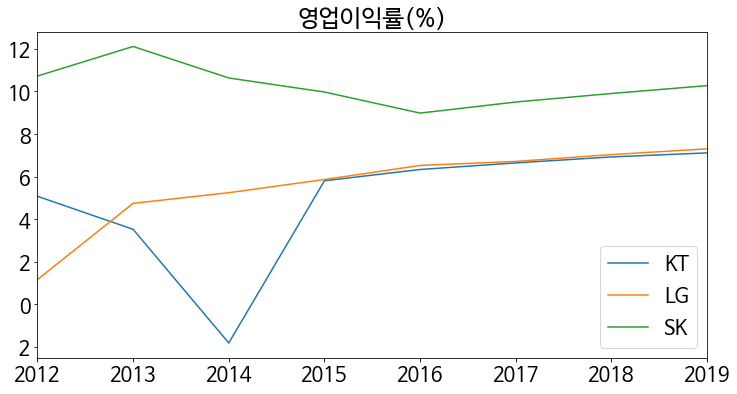

In [56]:
df_rob.plot()
plt.title('영업이익률(%)')

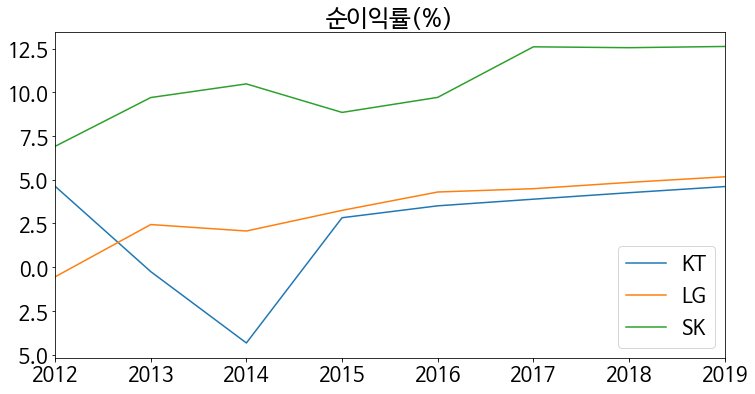

In [59]:
temp_dict = {'KT':summary_df['ron'], 'SK':df1['ron'], 'LG':df2['ron']}
df_roe = pd.DataFrame(temp_dict)
df_roe.plot()
plt.title('순이익률(%)')

## 2014년 KT 관련 뉴스기사 확인

In [63]:
import requests
import lxml.html
from urllib.parse import quote_plus

In [64]:
query = '030200'
query_percent = quote_plus(query.encode('cp949'))

In [65]:
url = ('http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper='
       '&stRelease=&ie=MS949&detail=0&rcsection=&sm=all.basic&pd=4&'
       'query={query}&startDate={start}&endDate={end}&page={page}')

In [68]:
articles = []
for page in range(1, 30):
    page_url = url.format(query=query_percent, start='2014-01-01', end='20174-07-01', page=page)
    res = requests.get(page_url)
    root = lxml.html.fromstring(res.text)
    titles = root.cssselect('a.go_naver')
    for title in titles:
        article_url = title.attrib['href']
        art_res = requests.get(article_url)
        art_root = lxml.html.fromstring(art_res.text)
        body = art_root.cssselect('#articleBodyContents')[0]
        articles.append(body.text_content())

In [69]:
len(articles)

23